In [ ]:
import numpy as np
import pandas as pd

from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
import json


%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(f'PATH/thesis_exp_tables.csv');

In [ ]:
normalizer_mask=(data["Normalizer"]=='normal') & (data["selectionMethod"]!="sf_XGBClassifier")

#FILTERING

In [ ]:
df10=data.loc[(data["featureNumber"]==10) & normalizer_mask,:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
df10.reset_index(inplace=True)
df10.columns=["model","fc10","in10","dt10","rf10"]


df15=data.loc[(data["featureNumber"]==15) & normalizer_mask,:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df15['TOTAL']=df15['TOTAL'].apply(lambda x: round(x*100, 2))
df15=df15.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
df15.reset_index(inplace=True)
df15.columns=["model","fc15","in15","dt15","rf15"]


df20=data.loc[(data["featureNumber"]==20) & normalizer_mask,:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df20['TOTAL']=df20['TOTAL'].apply(lambda x: round(x*100, 2))
df20=df20.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
df20.reset_index(inplace=True)
df20.columns=["model","fc20","in20","dt20","rf20"]


df25=data.loc[(data["featureNumber"]==25) & normalizer_mask,:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df25['TOTAL']=df25['TOTAL'].apply(lambda x: round(x*100, 2))
df25=df25.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
df25.reset_index(inplace=True)
df25.columns=["model","fc25","in25","dt25","rf25"]

data_frames = [df10,df15,df20,df25]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['model'],how='outer'), data_frames)

#Mean for Selection Feature

In [ ]:
test=df_merged[df_merged.filter(regex="in|model").columns].copy()
print(test["in10"].mean())
print(test["in15"].mean())
print(test["in20"].mean())
print(test["in25"].mean())
print((test["in10"].mean()+test["in15"].mean()+test["in20"].mean()+test["in25"].mean())/4)

#Selection Method

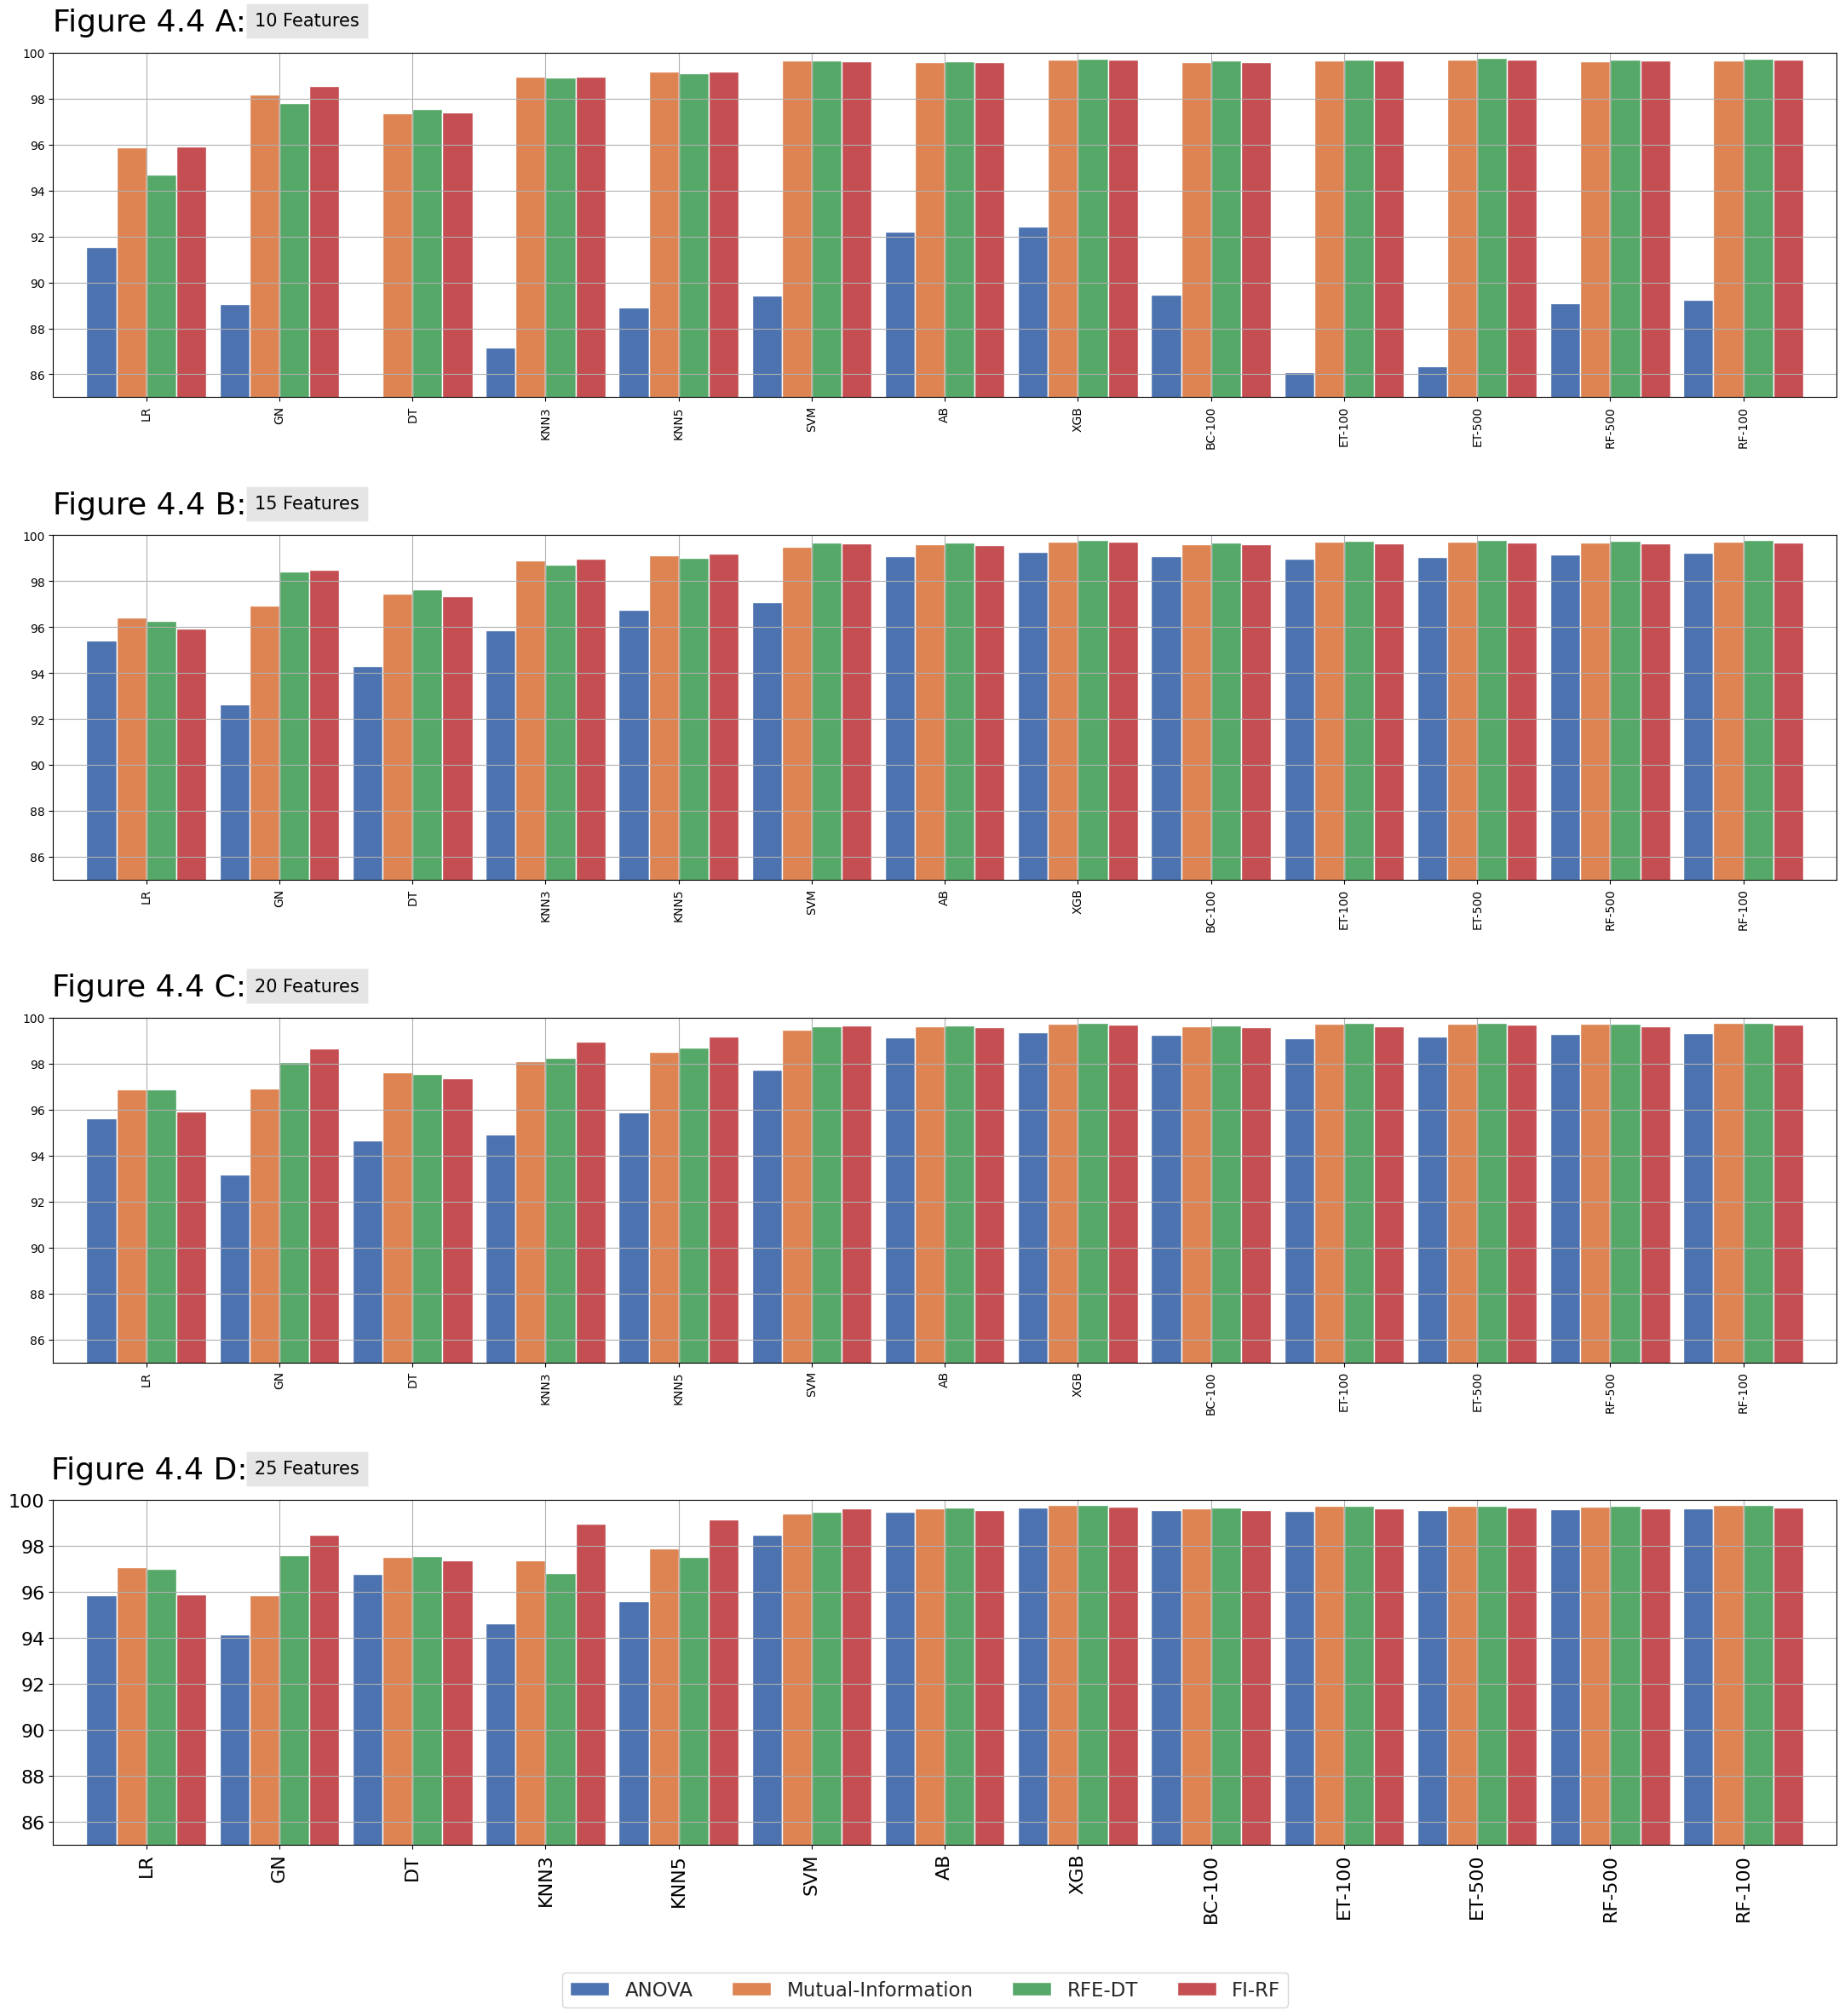

In [ ]:
fig, axs = plt.subplots(ncols=1,nrows=4, figsize=(22,24))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

y_label=["A","B","C","D"]

for index,selection_type in enumerate([10,15,20,25]):


  df=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
  df.set_index('model',inplace=True)
  df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

  df.rename(index={'lr':'LR','gn':'GN','dt':'DT','knn3':'KNN3','knn5':'KNN5','svc_n':'SVM','ab':'AB','xgb':'XGB','bc_100':'BC-100','et_100':'ET-100','et_500':'ET-500','rf_500':'RF-100','rf_100':'RF-500'},inplace=True)


  df.rename(columns={
      'fc{}'.format(selection_type):'ANOVA',
      'in{}'.format(selection_type):'Mutual-Information',
      'dt{}'.format(selection_type):'RFE-DT',
      'rf{}'.format(selection_type):'FI-RF',
  }, inplace=True)

  algorithm_dic={
  'fc':'ANOVA',
  'in':'Mutual-Information',
  'dt':'RFE-DT',
  'rf':'FI-RF',
}



  df = df[['ANOVA', 'Mutual-Information', 'RFE-DT', 'FI-RF']]
  
  sns.set(style="whitegrid",font_scale = 1.5)

  ax=df.plot(kind="bar",ax=axs[index],width=0.9)


  ax.set_ylim([85, 100])
  ax.set_xlabel('')

  # ax.set_xlabel(y_label[index],rotation=0,labelpad=0,fontsize=26)
  # ax.xaxis.set_label_coords(0.5,-0.2)
  ax.set_xlabel(f'Figure 4.4 {y_label[index]}:',rotation=0,labelpad=0,fontsize=26)
  ax.xaxis.set_label_coords(0.054,1.13)


  if index!=3:
    ax.get_legend().remove()
  else:
    # ax.legend(loc="upper right", bbox_to_anchor=(1.07, 1.025))
    ax.legend(loc="lower left", ncol=4,bbox_to_anchor=(0.28, -0.5))

 

  # ax.set_title("{} Algorithm".format(algorithm_dic[selection_type]))
  ax.set_title("{} Features".format(
      selection_type), 
      pad=0.5,
      y=1.09,
      x=0.113,
      fontsize=15, 
      loc='left',
      va="center",
      bbox=dict(facecolor='gray',alpha=0.2,boxstyle='square,pad=0.5')
  )


  ax.set_xticks(range(len(df)))
  ax.set_xticklabels(df.index)



fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

#Selection Number

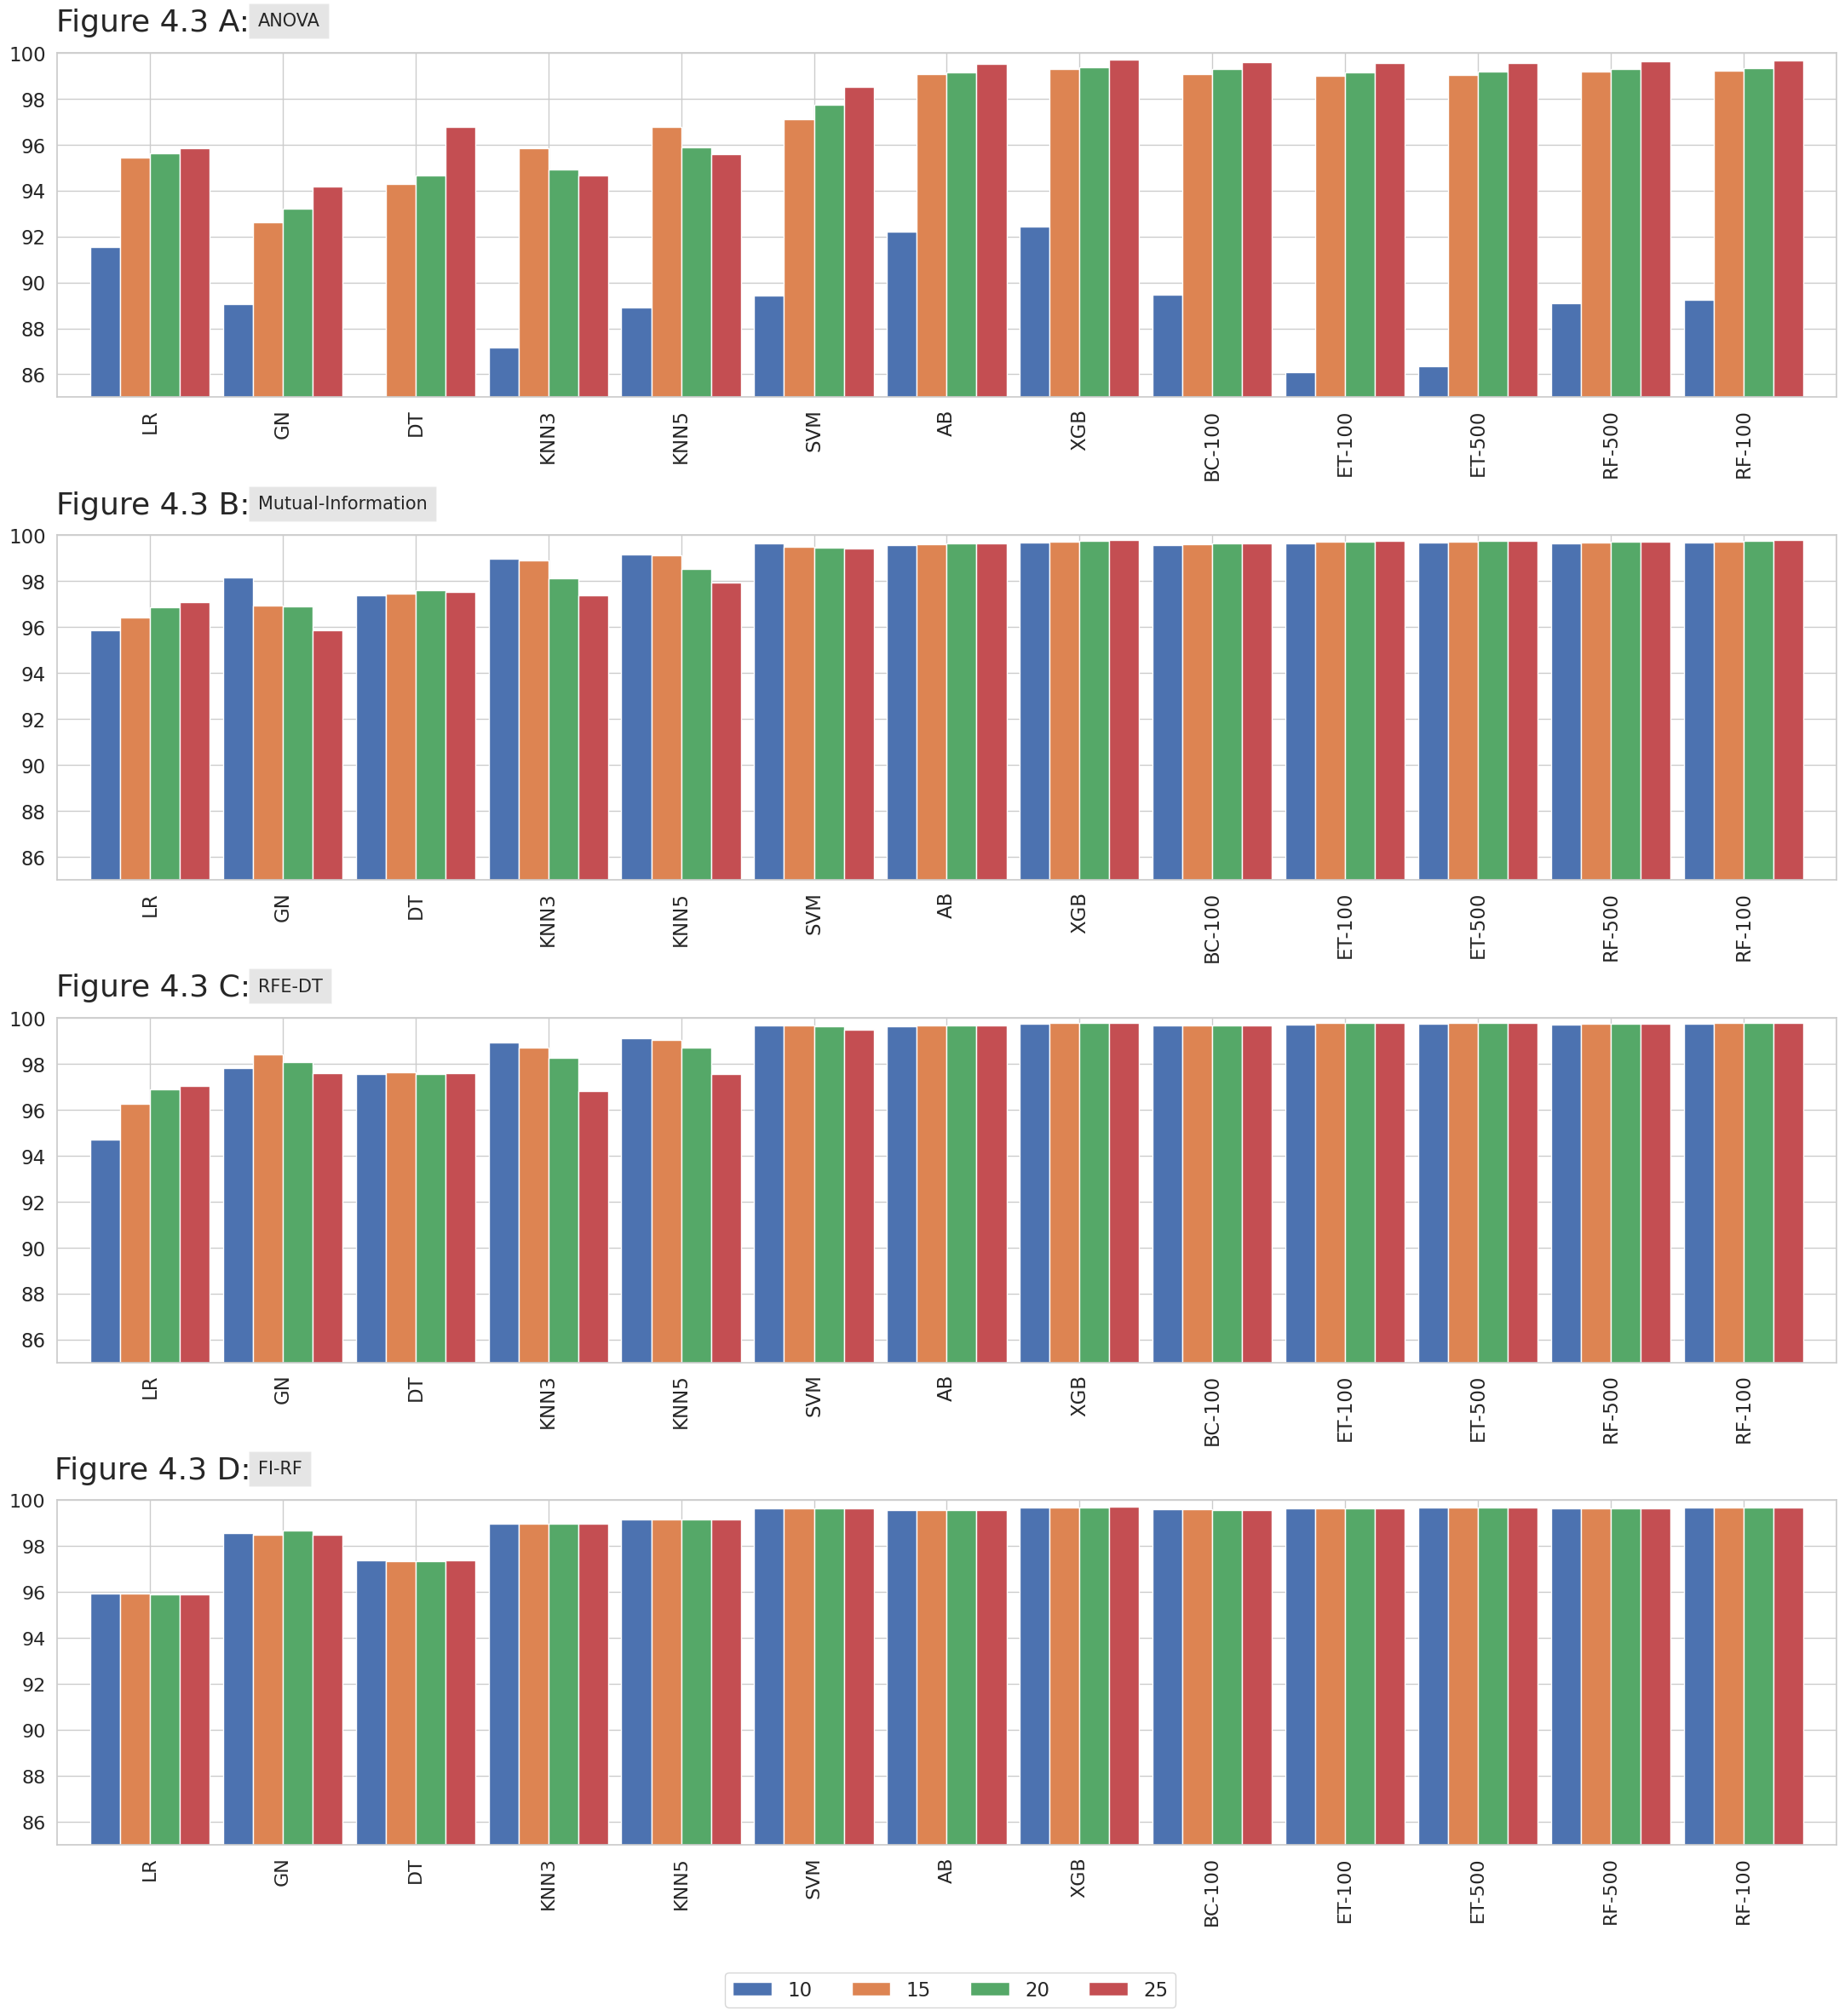

In [ ]:
algorithm_dic={
  'fc':'ANOVA',
  'in':'Mutual-Information',
  'dt':'RFE-DT',
  'rf':'FI-RF',
}

fig, axs = plt.subplots(ncols=1,nrows=4, figsize=(22,24))

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

y_label=["A","B","C","D"]


for index,selection_type in enumerate(["fc","in","dt","rf"]):


  df=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
  df.set_index('model',inplace=True)
  df=df.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])

  df.rename(index={'lr':'LR','gn':'GN','dt':'DT','knn3':'KNN3','knn5':'KNN5','svc_n':'SVM','ab':'AB','xgb':'XGB','bc_100':'BC-100','et_100':'ET-100','et_500':'ET-500','rf_500':'RF-100','rf_100':'RF-500'},inplace=True)


  df.rename(columns={
        '{}10'.format(selection_type):'10',
        '{}15'.format(selection_type):'15',
        '{}20'.format(selection_type):'20',
        '{}25'.format(selection_type):'25',
    }, inplace=True)



  df = df[['10', '15', '20', '25']]
  
  sns.set(style="whitegrid",font_scale = 1.5)

  ax=df.plot(kind="bar",ax=axs[index],width=0.9)


  ax.set_ylim([85, 100])
  ax.set_xlabel('')

  # ax.set_xlabel(y_label[index],rotation=0,labelpad=0,fontsize=26)
  # ax.xaxis.set_label_coords(0.5,-0.2)
  ax.set_xlabel(f'Figure 4.3 {y_label[index]}:',rotation=0,labelpad=0,fontsize=26)
  ax.xaxis.set_label_coords(0.054,1.13)


  if index!=3:
    ax.get_legend().remove()
  else:
    # ax.legend(loc="upper right", bbox_to_anchor=(1.07, 1.025))
    ax.legend(loc="lower left", ncol=4,bbox_to_anchor=(0.37, -0.5))

 

  # ax.set_title("{} Algorithm".format(algorithm_dic[selection_type]))
  ax.set_title("{}".format(
      algorithm_dic[selection_type]), 
      pad=0.5,
      y=1.09,
      x=0.113,
      fontsize=15, 
      loc='left',
      va="center",
      bbox=dict(facecolor='gray',alpha=0.2,boxstyle='square,pad=0.5')
  )


  ax.set_xticks(range(len(df)))
  ax.set_xticklabels(df.index)



fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.4)
plt.show()

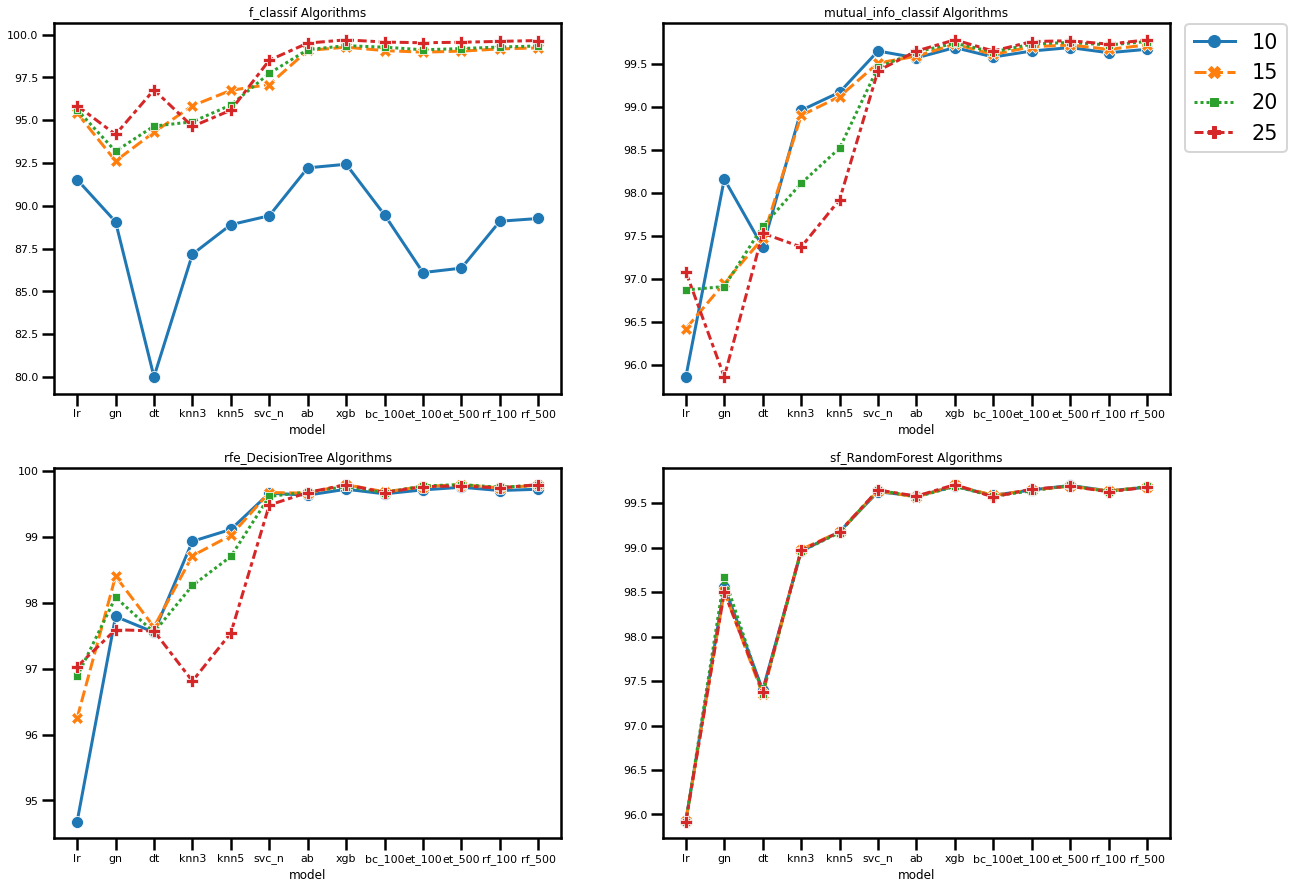

In [ ]:
algorithm_dic={
  'fc':'f_classif',
  'in':'mutual_info_classif',
  'dt':'rfe_DecisionTree',
  'rf':'sf_RandomForest',
}

fig, axs = plt.subplots(ncols=2,nrows=2, figsize=(20,15))

for index_row,selection_list in enumerate([["fc","in"],["dt","rf"]]):

  for index_col,selection_type in enumerate(selection_list):


    df_fc=df_merged[df_merged.filter(regex="{}|model".format(selection_type)).columns].copy()
    df_fc.set_index('model',inplace=True)
    df_fc=df_fc.reindex(['lr','gn','dt','knn3','knn5','svc_n','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])


    df_fc.rename(columns={
        '{}10'.format(selection_type):'10',
        '{}15'.format(selection_type):'15',
        '{}20'.format(selection_type):'20',
        '{}25'.format(selection_type):'25',
    }, inplace=True)

    df_fc = df_fc[['10', '15', '20', '25']]

    ax=sns.lineplot(
        data=df_fc,
        markers=True, 
        dashes=True,
        ax=axs[index_row][index_col]
    )
    if index_row!=0 or index_col!=1:
      ax.get_legend().remove()
    else:
      ax.legend(loc="upper right", bbox_to_anchor=(1.25, 1.025),fontsize='xx-large')

    ax.set_title("{} Algorithms".format(algorithm_dic[selection_type]))

    
    ax.set_xticks(range(len(df_fc)))
    ax.set_xticklabels(df_fc.index)
    sns.set_context("poster",font_scale=0.5)


plt.show()

In [ ]:
test=df_merged[df_merged.filter(regex="fc|model").columns]
test.set_index('model',inplace=True)
test.reindex(['gn','lr','svc_n','knn3','knn5','dt','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
test.columns=["10","15","20","25"]
test.head(20)

,10,15,20,25
model,,,,
ab,92.22,99.08,99.13,99.51
bc_100,89.47,99.07,99.27,99.57
dt,80.01,94.30,94.66,96.78
et_100,86.10,98.98,99.12,99.53
et_500,86.36,99.04,99.19,99.56
gn,89.07,92.62,93.19,94.17
knn3,87.17,95.85,94.91,94.64
knn5,88.90,96.75,95.89,95.59
lr,91.53,95.42,95.62,95.85


In [ ]:
test=df_merged[df_merged.filter(regex="in|model").columns]
test.set_index('model',inplace=True)
test.reindex(['gn','lr','svc_n','knn3','knn5','dt','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
test.columns=["10","15","20","25"]
test.head(20)

,10,15,20,25
model,,,,
ab,99.57,99.59,99.64,99.65
bc_100,99.58,99.61,99.64,99.65
dt,97.37,97.47,97.61,97.53
et_100,99.65,99.70,99.73,99.76
et_500,99.69,99.72,99.75,99.77
gn,98.16,96.95,96.91,95.86
knn3,98.96,98.90,98.11,97.37
knn5,99.17,99.12,98.52,97.92
lr,95.86,96.42,96.87,97.08


In [ ]:
test=df_merged[df_merged.filter(regex="dt|model").columns]
test.set_index('model',inplace=True)
test.reindex(['gn','lr','svc_n','knn3','knn5','dt','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
test.columns=["10","15","20","25"]
test.head(20)

,10,15,20,25
model,,,,
ab,99.63,99.66,99.68,99.67
bc_100,99.65,99.68,99.67,99.67
dt,97.55,97.63,97.55,97.57
et_100,99.71,99.76,99.77,99.76
et_500,99.75,99.79,99.79,99.77
gn,97.79,98.40,98.08,97.59
knn3,98.93,98.71,98.26,96.81
knn5,99.11,99.02,98.70,97.54
lr,94.68,96.25,96.88,97.03


In [ ]:
test=df_merged[df_merged.filter(regex="rf|model").columns]
test.set_index('model',inplace=True)
test.reindex(['gn','lr','svc_n','knn3','knn5','dt','ab','xgb','bc_100','et_100','et_500','rf_100','rf_500'])
test.columns=["10","15","20","25"]
test.head(20)

,10,15,20,25
model,,,,
ab,99.58,99.57,99.57,99.58
bc_100,99.59,99.59,99.58,99.57
dt,97.40,97.35,97.36,97.38
et_100,99.65,99.65,99.64,99.66
et_500,99.70,99.69,99.70,99.69
gn,98.56,98.51,98.67,98.50
knn3,98.96,98.98,98.96,98.97
knn5,99.18,99.18,99.17,99.18
lr,95.93,95.93,95.92,95.92


#EXTRA

In [ ]:
#Normalizer
df15=data.loc[(data["featureNumber"]==15) & normalizer_mask,:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()
df15['TOTAL']=df15['TOTAL'].apply(lambda x: round(x*100, 2))
df15=df15.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
df15.reset_index(inplace=True)

df15.head()

selectionMethod,modelName,f_classif,mutual_info_classif,rfe_DecisionTree,sf_RandomForest,sf_XGBClassifier
0,ab,99.07,99.35,99.30,99.22,97.45
1,bc_100,99.00,99.59,99.67,99.54,98.29
2,dt,94.42,97.33,97.35,97.19,93.04
3,et_100,99.09,99.69,99.72,99.65,98.21
4,et_500,99.18,99.72,99.75,99.68,98.53


In [ ]:
df10=data.loc[(data["featureNumber"]==25) & (data["Normalizer"]=='StandardScaler'),:].groupby(by=['selectionMethod','modelName']).agg(TOTAL=("test_roc_auc","mean")).reset_index()

df10['TOTAL']=df10['TOTAL'].apply(lambda x: round(x*100, 2))
df10=df10.pivot(index='modelName', columns='selectionMethod', values='TOTAL')
df10.columns=["fc10","in10","dt10","rf10","xgb10"]
df10.head(13)

,fc10,in10,dt10,rf10,xgb10
modelName,,,,,
ab,99.51,99.65,99.67,99.58,99.55
bc_100,99.56,99.65,99.68,99.56,99.45
dt,96.75,97.49,97.57,97.42,97.01
et_100,98.83,99.59,99.58,99.58,99.49
et_500,98.89,99.61,99.62,99.65,99.52
gn,89.60,89.34,88.31,88.29,86.47
knn3,90.19,92.05,90.60,97.90,97.99
knn5,91.77,93.46,92.09,98.32,98.36
lr,94.24,94.05,93.39,91.77,90.02


#Feature Extraction

In [ ]:
test1=data.loc[(data["Normalizer"]=='normal') &  (data["selectionMethod"]=="rfe_DecisionTree") & (data["featureNumber"]==25),:]
featureDict={}
for index, row in test1.iterrows():
  feature=json.loads(row["selectedFeatures"])
  for featureRow in feature:
    for itemFeature in featureRow:

      if itemFeature in featureDict:
        featureDict[itemFeature]+=1
      else:
        featureDict[itemFeature]=1
featureDF=pd.DataFrame(list(featureDict.items()),columns=["feature","count"]).sort_values("count",ascending=False)

print(featureDF["count"].sum()/65)

featureDF.head(25)

25.0


,feature,count
0,Name_entropy,65
12,followers_friends_ratio,65
24,tweet_freq,65
23,statuses_count,65
22,screen_name_length,65
20,num_digits_in_screen_name,65
19,name_length,65
18,listed_growth_rate,65
17,listed_count,65
1,Name_freq,65


In [ ]:
test1=data.loc[(data["Normalizer"]=='normal') &  (data["selectionMethod"]=="f_classif") & (data["featureNumber"]==25),:]
featureDict={}
for index, row in test1.iterrows():
  feature=json.loads(row["selectedFeatures"])
  for featureRow in feature:
    for itemFeature in featureRow:

      if itemFeature in featureDict:
        featureDict[itemFeature]+=1
      else:
        featureDict[itemFeature]=1
featureDF=pd.DataFrame(list(featureDict.items()),columns=["feature","count"]).sort_values("count",ascending=False)

print(featureDF["count"].sum()/65)

featureDF.head(25)

25.0


,feature,count
0,Name_entropy,65
1,Name_similarity,65
24,verified,65
23,statuses_count,65
22,screen_name_length,65
21,profile_use_background_image,65
20,profile_banner_url,65
19,profile_background_tile,65
18,profile_background_image_url_https,65
17,num_digits_in_screen_name,65


In [ ]:
test1=data.loc[(data["Normalizer"]=='normal') &  (data["selectionMethod"]=="mutual_info_classif") & (data["featureNumber"]==25),:]
featureDict={}
for index, row in test1.iterrows():
  feature=json.loads(row["selectedFeatures"])
  for featureRow in feature:
    for itemFeature in featureRow:

      if itemFeature in featureDict:
        featureDict[itemFeature]+=1
      else:
        featureDict[itemFeature]=1
featureDF=pd.DataFrame(list(featureDict.items()),columns=["feature","count"]).sort_values("count",ascending=False)

print(featureDF["count"].sum()/65)

featureDF.head(25)

25.0


,feature,count
0,Name_similarity,65
13,friends_growth_rate,65
23,statuses_count,65
22,screen_name_length,65
21,profile_use_background_image,65
20,profile_banner_url,65
19,profile_background_tile,65
18,profile_background_image_url_https,65
17,num_digits_in_screen_name,65
16,listed_growth_rate,65


In [ ]:
test1=data.loc[(data["Normalizer"]=='normal') &  (data["selectionMethod"]=="sf_RandomForest") & (data["featureNumber"]==20),:]
featureDict={}
for index, row in test1.iterrows():
  feature=json.loads(row["selectedFeatures"])
  for featureRow in feature:
    for itemFeature in featureRow:

      if itemFeature in featureDict:
        featureDict[itemFeature]+=1
      else:
        featureDict[itemFeature]=1
featureDF=pd.DataFrame(list(featureDict.items()),columns=["feature","count"]).sort_values("count",ascending=False)

print(featureDF["count"].sum()/65)

featureDF.head(15)

8.307692307692308


,feature,count
0,diff_days,65
1,favourites_count,65
2,favourites_growth_rate,65
3,followers_count,65
5,friends_count,65
6,friends_growth_rate,65
7,statuses_count,65
4,followers_growth_rate,42
8,followers_friends_ratio,35
10,listed_growth_rate,6


In [ ]:
test1=data.loc[(data["Normalizer"]=='StandardScaler') &  (data["selectionMethod"]=="sf_XGBClassifier") & (data["featureNumber"]==10),:]
featureDict={}
for index, row in test1.iterrows():
  feature=json.loads(row["selectedFeatures"])
  for featureRow in feature:
    for itemFeature in featureRow:

      if itemFeature in featureDict:
        featureDict[itemFeature]+=1
      else:
        featureDict[itemFeature]=1
featureDF=pd.DataFrame(list(featureDict.items()),columns=["feature","count"]).sort_values("count",ascending=False)

print(featureDF["count"].sum()/65)

featureDF.head(25)

3.9076923076923076


,feature,count
0,favourites_count,65
1,followers_count,65
2,friends_growth_rate,65
3,num_digits_in_screen_name,58
4,favourites_growth_rate,1


In [ ]:
test1=data.loc[(data["featureNumber"]==10),["selectionMethod","fit_time","score_time"]]
test1=test1.groupby("selectionMethod").agg(fitMean=("fit_time","mean"),scoreMean=("score_time","mean"))

test1["fullTime"]=test1["fitMean"]+test1["scoreMean"]
test1.sort_values("fitMean",inplace=True)

test1.drop(columns=["fitMean","scoreMean"],inplace=True)

test1

,fullTime
selectionMethod,
sf_XGBClassifier,181.753237
f_classif,267.624138
sf_RandomForest,321.866464
mutual_info_classif,378.398004
rfe_DecisionTree,596.695013
